In [1]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors




  0%|          | 0.00/172k [00:00<?, ?B/s]
100%|##########| 172k/172k [00:00<00:00, 108MB/s]


In [2]:
import zipfile

with zipfile.ZipFile("telco-customer-churn.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
print(df['TotalCharges'].dtype)

object


#Data cleaning

In [10]:
blank_rows = df[df['TotalCharges'].str.strip() == '']
blank_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
print(f"Rows with blank TotalCharges: {len(blank_rows)}")

Rows with blank TotalCharges: 11


In [12]:
# Convert TotalCharges to numeric (turns blanks to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Count how many NaNs in TotalCharges
print(f"TotalCharges NaNs after conversion: {df['TotalCharges'].isnull().sum()}")

TotalCharges NaNs after conversion: 11


In [13]:
# Drop rows where TotalCharges is NaN (these were the blanks)
df_1 = df.dropna(subset=['TotalCharges'])

In [14]:
# Check for nulls now
df_1['TotalCharges'].isnull().sum()

0

In [15]:
df_1 = df_1.drop(['customerID'], axis=1)

In [16]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df_1['SeniorCitizen'] = df_1['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
df_1['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7032, dtype: object

In [18]:
#Categorical columns
df_1.select_dtypes(include='object').nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

#Visualization

In [19]:
# Set style
sns.set(style='whitegrid')

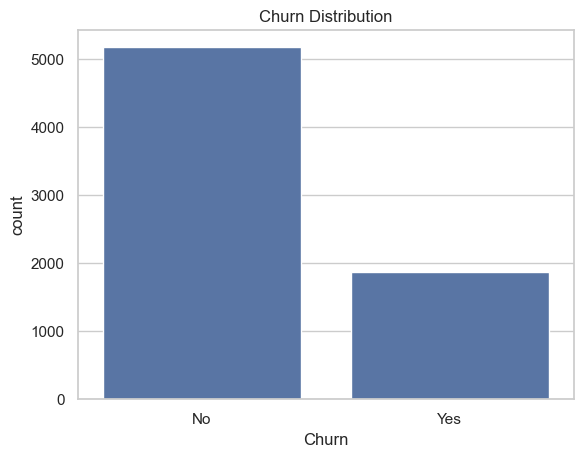

In [22]:
#Churn Distribution

# Countplot
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight') 
plt.show()

In [25]:
# Percentage
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
churn_rate = df['Churn_numeric'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 26.54%


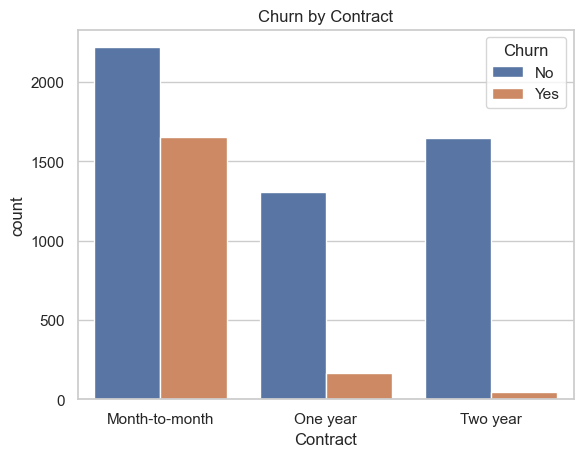

In [26]:
# Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract')
plt.savefig('Churn by Contract.png', dpi=300, bbox_inches='tight') 
plt.show()

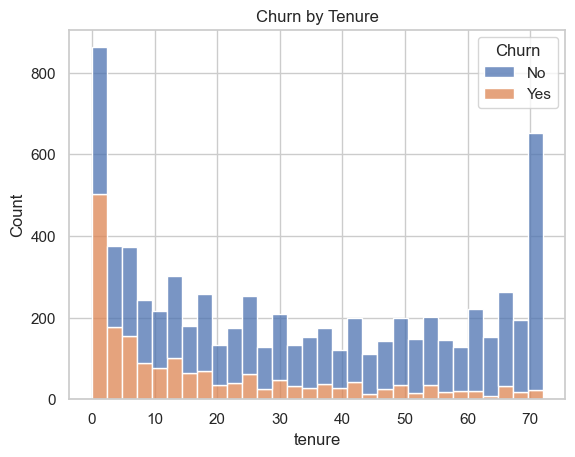

In [27]:
# Tenure Analysis
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title('Churn by Tenure')
plt.savefig('Churn by Tenure.png', dpi=300, bbox_inches='tight') 
plt.show()

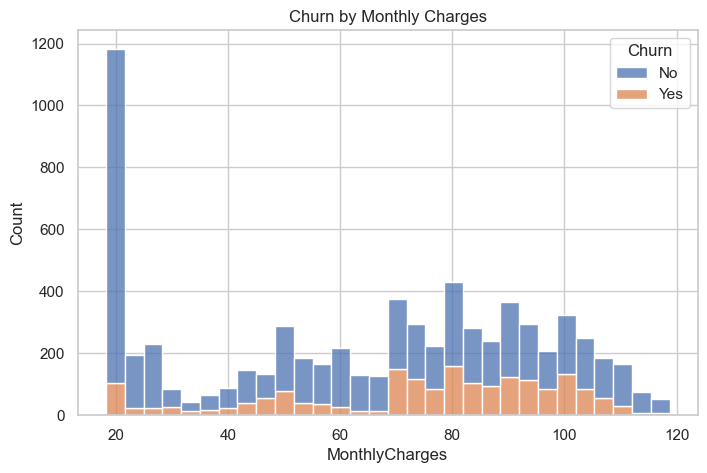

In [28]:
# Monthly Charges Analysis
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Churn by Monthly Charges')
plt.savefig('Churn by Monthly Charges.png', dpi=300, bbox_inches='tight') 
plt.show()

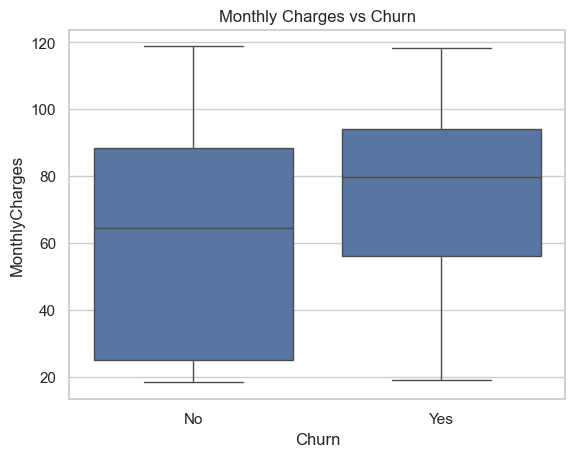

In [29]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.savefig('Monthly Charges vs Churn_boxplot.png', dpi=300, bbox_inches='tight') 
plt.show()

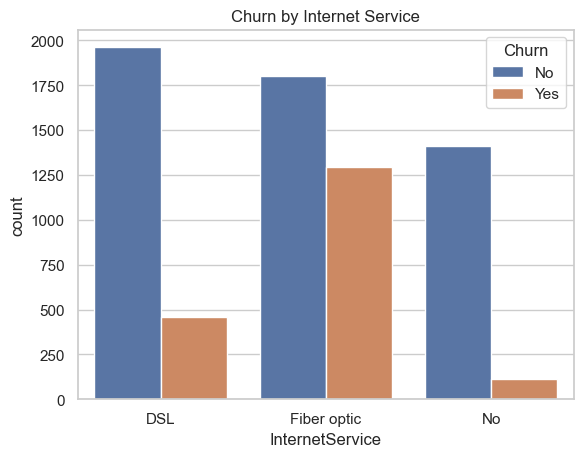

In [30]:
# Internet Service vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')
plt.savefig('Churn by Internet Service.png', dpi=300, bbox_inches='tight') 
plt.show()

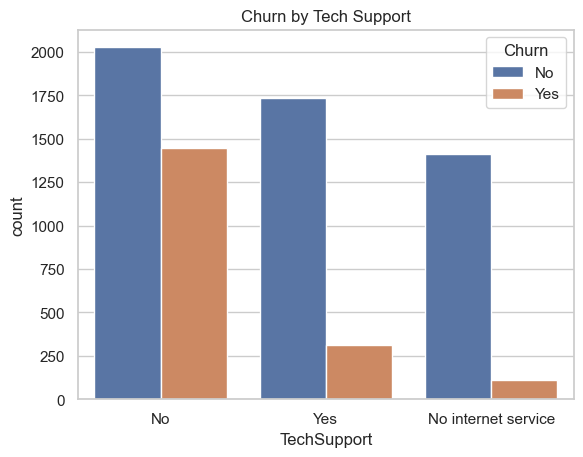

In [31]:
# Tech Support vs Churn
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn by Tech Support')
plt.savefig('Churn by Tech Support.png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
# At-Risk Segment
at_risk = df[(df['Contract'] == 'Month-to-month') & 
             (df['TechSupport'] == 'No') & 
             (df['tenure'] < 12)]

print(f"\nAt-risk customers count: {len(at_risk)}")
print(f"Percentage of total: {100 * len(at_risk)/len(df):.2f}%")


At-risk customers count: 1313
Percentage of total: 18.64%


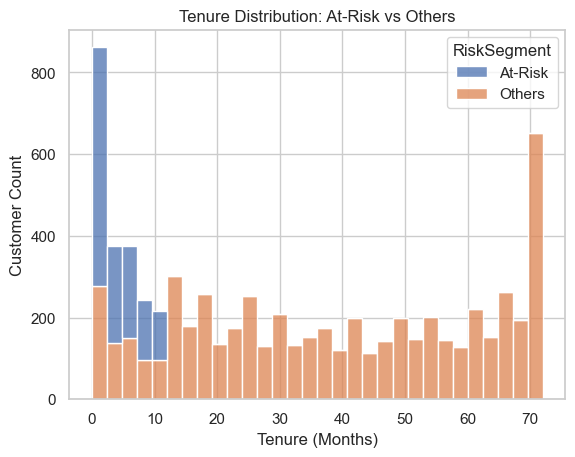

In [53]:
#Tenure Distribution: At-Risk vs Others
df['RiskSegment'] = 'Others'
df.loc[at_risk.index, 'RiskSegment'] = 'At-Risk'

sns.histplot(data=df, x='tenure', hue='RiskSegment', bins=30, multiple='stack')
plt.title('Tenure Distribution: At-Risk vs Others')
plt.xlabel('Tenure (Months)')
plt.ylabel('Customer Count')
plt.savefig('Tenure_Distribution_At-Risk_vs_Others.png', dpi=300, bbox_inches='tight')
plt.show()

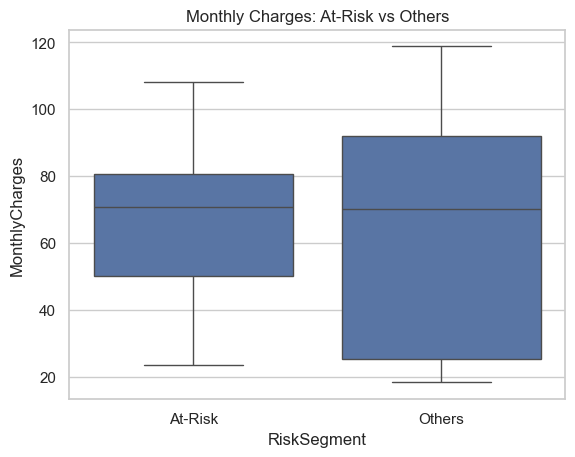

In [58]:
#Monthly Charges: At-Risk vs Others
sns.boxplot(data=df, x='RiskSegment', y='MonthlyCharges')
plt.title('Monthly Charges: At-Risk vs Others')
plt.savefig('Monthly_Charges_At-Risk_vs_Others.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
# Convert 'Churn' column to binary: Yes = 1, No = 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

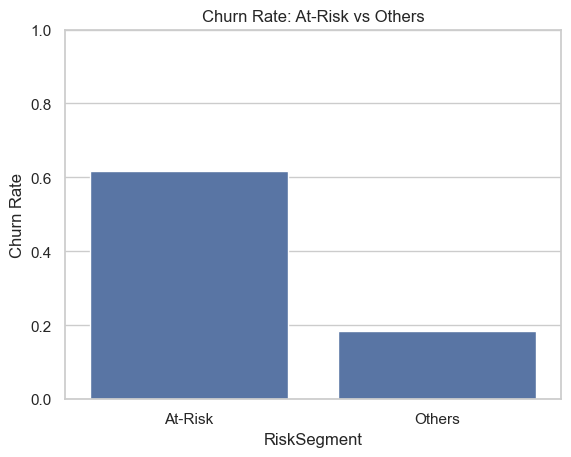

In [61]:
#Churn Rate: At-Risk vs Others
churn_rate = df.groupby('RiskSegment')['Churn'].mean().reset_index()
sns.barplot(data=churn_rate, x='RiskSegment', y='Churn')
plt.title('Churn Rate: At-Risk vs Others')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.savefig('Churn_Rate_At-Risk_vs_Others.png', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
print(df[['Churn', 'Contract']].head(10))  # sample data
print(df['Churn'].value_counts())          # counts of churn values
print(df['Contract'].value_counts())       # counts of contract types

   Churn        Contract
0      0  Month-to-month
1      0        One year
2      1  Month-to-month
3      0        One year
4      1  Month-to-month
5      1  Month-to-month
6      0  Month-to-month
7      0  Month-to-month
8      1  Month-to-month
9      0        One year
Churn
0    5174
1    1869
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


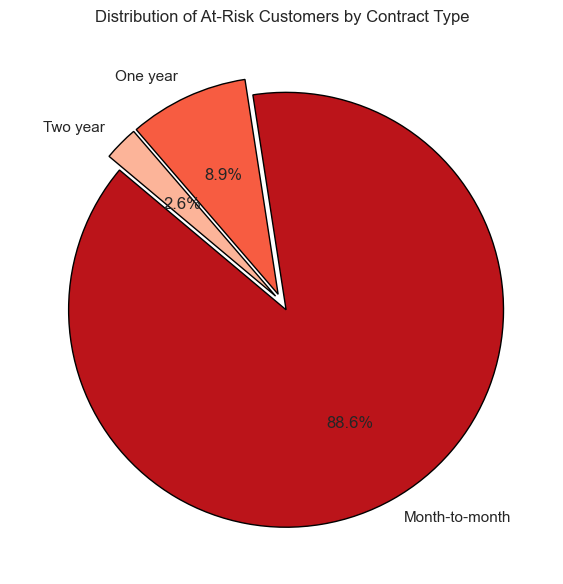

In [63]:
#Contract Type Breakdown for At-Risk Group

at_risk_df = df[df['Churn'] == 1]

# Count at-risk customers by Contract type
contract_counts = at_risk_df['Contract'].value_counts()

# Colors for the pie slices
colors = plt.cm.Reds_r(range(50, 255, int(205/len(contract_counts))))

plt.figure(figsize=(6,6))
plt.pie(contract_counts,
        labels=contract_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        explode=[0.04]*len(contract_counts),
        wedgeprops={'edgecolor':'black'},
        colors=colors)
plt.title('Distribution of At-Risk Customers by Contract Type')
plt.tight_layout()
plt.savefig('Distribution of At-Risk Customers by Contract Type.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# Export at-risk customers
at_risk.to_csv("at_risk_customers.csv", index=False)
print("At-risk customer list saved as 'at_risk_customers.csv'")

At-risk customer list saved as 'at_risk_customers.csv'
